# **Libraries**

In [6]:
import statistics
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob as glob
%matplotlib inline
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn import preprocessing
import cv2
import os
import random

# **Data**

**Importing and pre-processing data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
norm_factor = 255.

In [7]:
path_train = '/content/drive/MyDrive/MEDICALE_IMAGES_DATASET/Train'
imageList = os.listdir(path_train)
HR_images_list_train = []
for image in (imageList):
            picture = cv2.imread(os.path.join(path_train,image))
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY) 
            picture = cv2.resize(picture,(56,56))
            picture = picture.astype(np.float32)/norm_factor
            picture = np.array(picture)
            HR_images_list_train.append(picture)

In [8]:
path_test = '/content/drive/MyDrive/MEDICALE_IMAGES_DATASET/Test'
imageList = os.listdir(path_test)
HR_images_list_test = []
for image in (imageList):
            picture = cv2.imread(os.path.join(path_test,image))
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
            picture = picture.astype(np.float32)/norm_factor 
            picture = cv2.resize(picture,(56,56))
            picture = np.array(picture)
            HR_images_list_test.append(picture)

In [9]:
x_train = HR_images_list_train
x_test = HR_images_list_test

In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [11]:
x_train.shape

(2629, 56, 56)

In [ ]:
x_test.shape

(1130, 56, 56)

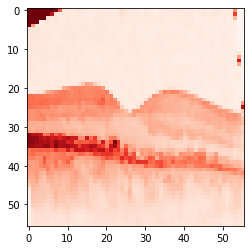

In [ ]:

plt.imshow(x_train[1], cmap = 'Reds')


In [12]:
dimension = x_train.shape[1]
dimension

56

**Pre-processing data**

Here, we need to noisy the images, then, we apply a speckle noisy matrix and clip the images between 0 and 1.

In [13]:
import torch 
import random
from skimage.util import random_noise
def speckle(img) :
  hasil = torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))
  hasil = hasil.numpy()
  return hasil 
    

In [14]:
x_train_noisy = speckle(x_train)
x_test_noisy = speckle(x_test)


Visualizing some noise images images.

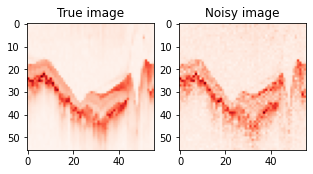

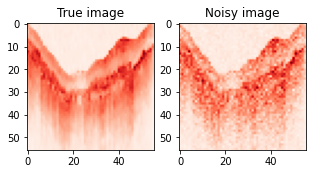

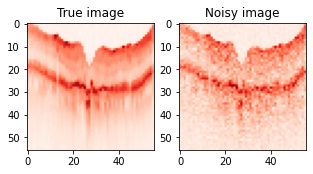

In [15]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(5, 5)
    axes[0].set_title('True image')
    im0 = axes[0].imshow(x_test[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[1].set_title('Noisy image')
    im1 = axes[1].imshow(x_test_noisy[i].reshape(dimension, dimension), cmap = 'Reds')

# **Building the GAN**

In [16]:
input_img = keras.Input(shape = (56, 56, 1))

 **Generator**

In [17]:
#SR-GAN
#Block 1 
x1 = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(input_img)

#Block 2
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x1)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x2 = layers.Add()([x1,x])
#Block 3
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x2)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x3 = layers.Add()([x2,x])
#Block 4
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x3)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x4 = layers.Add()([x3,x])
#Block 5
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x4)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x5 = layers.Add()([x4,x])
#Block 6
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x5)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x6 = layers.Add()([x5,x])
#Block 7
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x6)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x7 = layers.Add()([x1,x])
#Block 8 
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x7)
#x8 = layers.UpSampling2D(size = (2, 2))(x)
x8 = layers.Conv2DTranspose(filters=30,kernel_size=(3,3),strides=(1, 1),padding='same',output_padding=None,data_format=None,dilation_rate=(1, 1),activation=None,use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None,)(x)
#Block 9
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x8)
#x9 = layers.UpSampling2D(size = (2, 2))(x)
x9 = layers.Conv2DTranspose(filters=32,kernel_size=(3,3),strides=(1, 1),padding='same',output_padding=None,data_format=None,dilation_rate=(1, 1),activation=None,use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None,)(x)
#Block 10
generator = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None , padding = 'same')(x9)


**Desciminator**

In [18]:
#SR-GAN
#Block 1 
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same')(generator)
x1 = layers.LeakyReLU(alpha=0.3)(x)
#Block 2
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x1)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x2 = layers.LeakyReLU(alpha=0.3)(x)
#Block 3
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x2)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x3 = layers.LeakyReLU(alpha=0.3)(x)
#Block 4
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x3)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x4 = layers.LeakyReLU(alpha=0.3)(x)
#Block 5
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x4)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x5 = layers.LeakyReLU(alpha=0.3)(x)
#Block 6
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x5)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x6 = layers.LeakyReLU(alpha=0.3)(x)
#Block 7
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x6)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x7 = layers.LeakyReLU(alpha=0.3)(x)
#Block 8
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x7)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x8 = layers.LeakyReLU(alpha=0.3)(x)
#Block 9
x = layers.Dense(1024)(x8)
x = layers.LeakyReLU(alpha=0.3)(x)
discriminator = layers.Dense(1)(x)

**GAN**

In [19]:
gan = keras.Model(input_img, discriminator)

In [20]:
gan.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 56, 56, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 56, 56, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 56, 56, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 56, 56, 32)  224         ['conv2d_1[0][0]']               
 alization)                                                                                   

### Compilation

In [21]:
#my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#gan.compile(optimizer= my_adam_optimizer, loss='binary_crossentropy')

gan.compile(optimizer='adam', loss='binary_crossentropy') #by default lr = 0.1


### Fitting

In [31]:
validation_split = 0.5
#epochs = 51
epochs = 200                                                                                                      
history = gan.fit(x_train_noisy, x_train, epochs = epochs, batch_size = 10, shuffle = True,validation_split = validation_split )#validation_split = validation_split

Epoch 1/200
132/132 [==============================] - 5s 38ms/step - loss: 0.4926 - val_loss: 0.4897
Epoch 2/200
132/132 [==============================] - 5s 38ms/step - loss: 0.4925 - val_loss: 0.4889
Epoch 3/200
132/132 [==============================] - 5s 38ms/step - loss: 0.5116 - val_loss: 1.7499
Epoch 4/200
132/132 [==============================] - 5s 38ms/step - loss: 0.5007 - val_loss: 0.5161
Epoch 5/200
132/132 [==============================] - 5s 38ms/step - loss: 0.4989 - val_loss: 0.4990
Epoch 6/200
132/132 [==============================] - 5s 38ms/step - loss: 0.4976 - val_loss: 0.5031
Epoch 7/200
132/132 [==============================] - 5s 38ms/step - loss: 0.4963 - val_loss: 0.5241
Epoch 8/200
132/132 [==============================] - 5s 38ms/step - loss: 0.4953 - val_loss: 0.4964
Epoch 9/200
132/132 [==============================] - 5s 38ms/step - loss: 0.4946 - val_loss: 0.4946
Epoch 10/200
132/132 [==============================] - 5s 38ms/step - loss: 0.493

### Tracking the history of the training stage

In [32]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [33]:
train_loss = history.history['loss']
train_val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

Visualizing the history of the training.

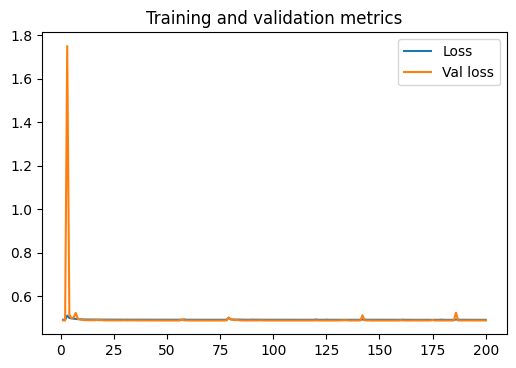

In [34]:
plt.figure(dpi = 100)
plt.plot(epochs, train_loss, label = 'Loss')
plt.plot(epochs, train_val_loss, label = 'Val loss')
plt.title('Training and validation metrics')
plt.legend()
plt.savefig('history.png')

In [35]:
gan.save('gan.h5')

### Prediction

In [36]:
gan = tf.keras.models.load_model("/content/gan.h5")

In [59]:
all_denoised_images = gan.predict(x_test_noisy)

In [73]:
all_denoised_images = np.array(all_denoised_images)
all_denoised_images=np.reshape(all_denoised_images, (1130,56,56))

# Save and load perdections

In [ ]:
# Save predictions
def save_to_npy(filename, predictions):
    with open(filename, 'wb') as f:
         np.save(f, predictions)

In [ ]:
# Load predictions
def load_saved_preds(filename):
    with open(filename, 'rb') as f:
         a = np.load(f)
    return a

In [ ]:
save_to_npy("all_denoised_images1.npy", all_denoised_images)

In [ ]:
all_denoised_images = load_saved_preds("../input/models/VGG19_pred_npy1.npy")

# Evaluation

In [104]:
test_loss  = gan.evaluate(x_test_noisy, x_test, batch_size = 20)
test_loss

57/57 [==============================] - 1s 17ms/step - loss: 0.4868


0.4867995083332062

# Visual results

Here, we can compare our visual results looking side by side the noisy, targets and denoised  images.

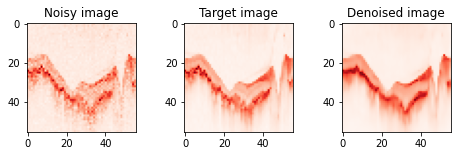

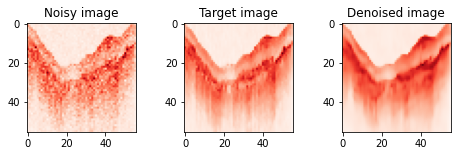

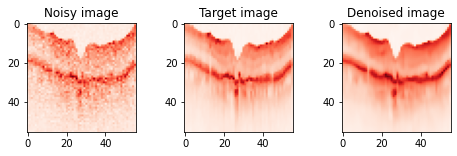

In [58]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(x_test_noisy[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(x_test[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(all_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    #plt.savefig(f'comparison-{i}.png')

# Prediction using x-ray images

In [95]:
path_x_ray = '/content/drive/MyDrive/MEDICALE_IMAGES_DATASET/other_prediction/X-ray'
imageList = os.listdir(path_x_ray)
X_RAY_images_list = []
X_RAY_images_list_noisy = []
for image in (imageList):
            picture = cv2.imread(os.path.join(path_x_ray,image))
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY) 
            picture = cv2.resize(picture,(56,56))
            picture = picture.astype(np.float32)/norm_factor
            picture = np.array(picture)
            pic_noisy = speckle(picture)
            X_RAY_images_list.append(picture)
            X_RAY_images_list_noisy.append(pic_noisy)

In [96]:
X_RAY_images_list = np.array(X_RAY_images_list)
X_RAY_images_list_noisy = np.array(X_RAY_images_list_noisy)

In [97]:
X_RAY_denoised_images = gan.predict(X_RAY_images_list_noisy)
X_RAY_denoised_images = np.array(X_RAY_denoised_images)
X_RAY_denoised_images=np.reshape(X_RAY_denoised_images, (155,56,56))

In [106]:
test_loss_X_RAY  = gan.evaluate(X_RAY_images_list_noisy, X_RAY_denoised_images, batch_size = 20)
test_loss_X_RAY

8/8 [==============================] - 0s 19ms/step - loss: 0.5783


0.5783054828643799

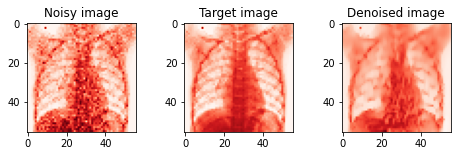

In [57]:
n = 1
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(X_RAY_images_list_noisy[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(X_RAY_images_list[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(X_RAY_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds') 
    #plt.savefig(f'comparison-{i}.png')

# Prediction using MRI images

In [45]:
path_MRI = '/content/drive/MyDrive/MEDICALE_IMAGES_DATASET/other_prediction/MRI'
imageList = os.listdir(path_MRI)
MRI_images_list = []
MRI_images_list_noisy = []
for image in (imageList):
            picture = cv2.imread(os.path.join(path_MRI,image))
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY) 
            picture = cv2.resize(picture,(56,56))
            picture = picture.astype(np.float32)/norm_factor
            picture = np.array(picture)
            pic_noisy = speckle(picture)
            MRI_images_list.append(picture)
            MRI_images_list_noisy.append(pic_noisy)

In [46]:
MRI_images_list = np.array(MRI_images_list)
MRI_images_list_noisy = np.array(MRI_images_list_noisy)

In [47]:
MRI_denoised_images = gan.predict(MRI_images_list_noisy)

In [83]:
MRI_denoised_images = np.array(MRI_denoised_images)
MRI_denoised_images=np.reshape(MRI_denoised_images, (146,56,56))

In [107]:
test_loss_MRI  = gan.evaluate(MRI_images_list_noisy, MRI_denoised_images, batch_size = 20)
test_loss_MRI

8/8 [==============================] - 0s 21ms/step - loss: 0.4103


0.4103483557701111

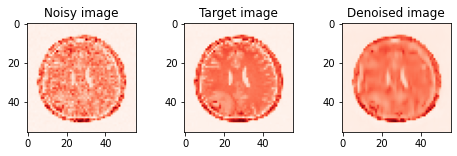

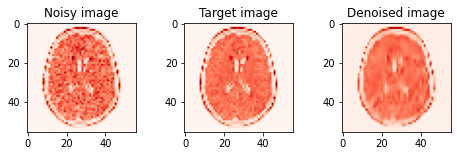

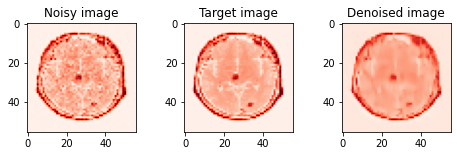

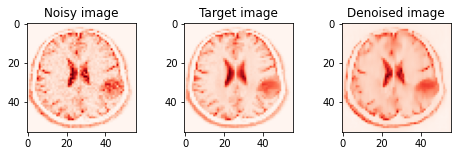

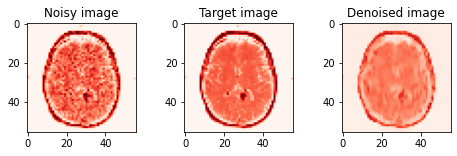

In [48]:
n = 5
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(MRI_images_list_noisy[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(MRI_images_list[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(MRI_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds') 
    #plt.savefig(f'comparison-{i}.png')

# Prediction using CT images

In [49]:
path_CT = '/content/drive/MyDrive/MEDICALE_IMAGES_DATASET/other_prediction/head_ct'
imageList = os.listdir(path_CT)
CT_images_list = []
CT_images_list_noisy = []
for image in (imageList):
            picture = cv2.imread(os.path.join(path_CT,image))
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY) 
            picture = cv2.resize(picture,(56,56))
            picture = picture.astype(np.float32)/norm_factor
            picture = np.array(picture)
            pic_noisy = speckle(picture)
            CT_images_list.append(picture)
            CT_images_list_noisy.append(pic_noisy)

In [50]:
CT_images_list = np.array(CT_images_list)
CT_images_list_noisy = np.array(CT_images_list_noisy)

In [51]:
CT_denoised_images = gan.predict(CT_images_list_noisy)

In [86]:
CT_denoised_images = np.array(CT_denoised_images)
CT_denoised_images=np.reshape(CT_denoised_images, (155,56,56))

In [108]:
test_loss_CT  = gan.evaluate(CT_images_list_noisy, CT_denoised_images, batch_size = 20)
test_loss_CT

8/8 [==============================] - 0s 18ms/step - loss: 0.4805


0.4805070459842682

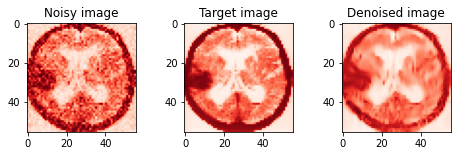

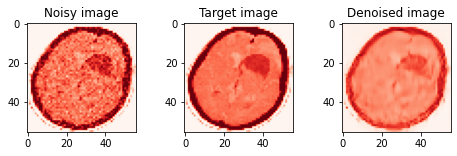

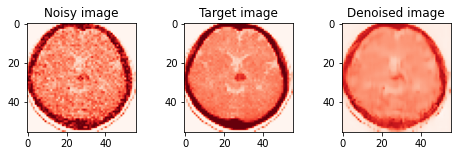

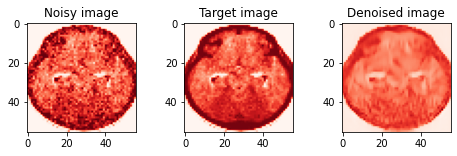

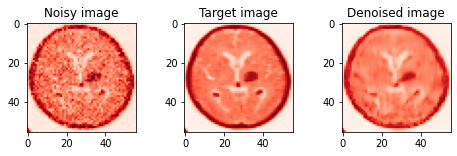

In [52]:
n = 5
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(CT_images_list_noisy[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(CT_images_list[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(CT_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds') 
    #plt.savefig(f'comparison-{i}.png')

# **Image metric**

# Rapport signal/bruit de crête (PSNR)
Dépendant du contexte, généralement plus il est élevé, mieux c'est.

In [72]:
psnr_OCT = tf.image.psnr(all_denoised_images,x_test_noisy, max_val = 1)
psnr_OCT

<tf.Tensor: shape=(), dtype=float32, numpy=24.155659>

**MRI IMAGES**

In [87]:
psnr_MRI = tf.image.psnr(MRI_denoised_images,MRI_images_list_noisy, max_val = 1)
psnr_MRI

<tf.Tensor: shape=(), dtype=float32, numpy=21.204674>

**X-RAY IMAGES**

In [88]:
psnr_X_RAY = tf.image.psnr(X_RAY_denoised_images, X_RAY_images_list, max_val = 1)
psnr_X_RAY

<tf.Tensor: shape=(), dtype=float32, numpy=22.19172>

**CT IMAGES**

In [89]:
psnr_CT = tf.image.psnr(CT_denoised_images, CT_images_list, max_val = 1)
psnr_CT

<tf.Tensor: shape=(), dtype=float32, numpy=20.216919>

# Structural Similarity Index (SSIM)


In [90]:
from skimage.metrics import structural_similarity
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

**OCT IMAGES**

In [91]:
similarity_OCT = []

for i in range(len(HR_images_list_test)) : 
  sim = structural_sim(x_test[i],all_denoised_images[i])
  similarity_OCT.append(sim)

In [ ]:
similarity_OCT

In [92]:
mean_similarity_OCT = statistics.mean(similarity_OCT)
mean_similarity_OCT

0.9435005023406069

**MRI IMAGES**

In [93]:
similarity_MRI = []

for i in range(len(MRI_images_list)) : 
  sim = structural_sim(MRI_images_list[i],MRI_denoised_images[i])
  similarity_MRI.append(sim)

In [ ]:
similarity_MRI

In [94]:
mean_similarity_MRI = statistics.mean(similarity_MRI)
mean_similarity_MRI

0.8340159156985884

**X-RAY IMAGES**

In [99]:
similarity_X_RAY = []

for i in range(len(X_RAY_images_list)) : 
  sim = structural_sim(X_RAY_images_list[i],X_RAY_denoised_images[i])
  similarity_X_RAY.append(sim)

In [ ]:
similarity_X_RAY

In [100]:
mean_similarity_X_RAY = statistics.mean(similarity_X_RAY)
mean_similarity_X_RAY

0.7393379420823255

**CT IMAGES**

In [102]:
similarity_CT = []

for i in range(len(CT_images_list)) : 
  sim = structural_sim(CT_images_list[i],CT_denoised_images[i])
  similarity_CT.append(sim)

In [ ]:
similarity_CT

In [103]:
mean_similarity_CT = statistics.mean(similarity_CT)
mean_similarity_CT

0.814043529221598